In [1]:
import matplotlib
from pycocotools.coco import COCO
# 查看默认图片显示终端
print(matplotlib.get_backend())  # agg是一个没有图形显示界面的终端
#matplotlib.use('QT5Agg')  # 应先安装有pyqt5、pyqt5-sip，QT5Agg有图形显示界面
print(matplotlib.get_backend()) 
#%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt


module://ipykernel.pylab.backend_inline
module://ipykernel.pylab.backend_inline


In [2]:
annFile = './cocos2014/annotations/instances_train2014.json'
coco = COCO(annFile) 

loading annotations into memory...
Done (t=16.65s)
creating index...
index created!


In [3]:
cats = coco.loadCats(coco.getCatIds())
for cat in cats:
    print(cat)

{'supercategory': 'person', 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}
{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}
{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}
{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}
{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}
{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}
{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}
{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}
{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}
{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}
{'supercategory': 'animal', 'id': 16, 'name': 'bird'}
{'supercategory': 'animal', 'id': 17, 'name': 'cat'}
{'supercategory': 'animal', 'id': 18, 'name': 'dog'}
{'supercategory': 'animal', 'id':

In [4]:
# catNms 为 {'supercategory': 'person', 'id': 1, 'name': 'person'} 中的 'name'的值，可以为多个
catIds = coco.getCatIds(catNms=['bicycle'])  # 返回列表，装着id值，实际上就是'id'值
print(catIds)

# 根据类别ID获取该类别所有图片ID
imgIds = coco.getImgIds(catIds=catIds)

# 查看图片ID
print('catIds:', catIds, '共有', len(imgIds),'张图片')
print('查看前5张图片的Id：', imgIds[:5])


[2]
catIds: [2] 共有 2287 张图片
查看前5张图片的Id： [196610, 344067, 155652, 417797, 516105]


In [5]:
index = imgIds[np.random.randint(0,len(imgIds))]
print('随机获取的图片ID为：',index)

随机获取的图片ID为： 385971


In [6]:
# 获取index的图片，index可以为一个列表
imgs = coco.loadImgs(index)  # 返回列表
for img in imgs:  # 只有一张图片，因此列表只有一个内容，只循环一次
    print(img) # 打印图片信息内容

{'license': 1, 'file_name': 'COCO_train2014_000000385971.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000385971.jpg', 'height': 378, 'width': 504, 'date_captured': '2013-11-15 00:18:06', 'flickr_url': 'http://farm5.staticflickr.com/4081/4899846637_7d1c0e869d_z.jpg', 'id': 385971}


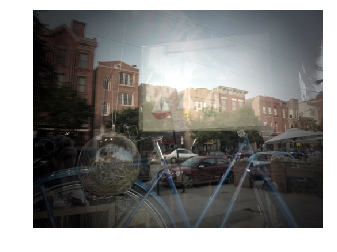

In [7]:
img = imgs[0]
image = io.imread(img['coco_url'])  # io.imread可以接收文件/url参数
plt.axis('off')
plt.imshow(image)
plt.show()

In [8]:
#获取标注信息
annIds = coco.getAnnIds(imgIds=img['id'],
                       catIds=catIds)
print(annIds)

[2168168]


In [9]:
#加载标注信息
ann = coco.loadAnns(annIds)
print(ann)
#for ann in anns:
#    print(ann.keys())#（segmentation（分割）、bbox（框）、category_id（类别））


[{'segmentation': [[2.14, 294.8, 67.53, 273.79, 93.6, 273.4, 148.87, 276.12, 190.91, 295.97, 200.25, 304.15, 218.93, 270.28, 205.31, 244.6, 190.91, 245.76, 173.78, 231.75, 178.45, 215.41, 203.75, 201.0, 245.78, 198.28, 270.69, 206.06, 225.16, 230.58, 239.17, 272.23, 264.86, 310.76, 280.81, 358.63, 339.19, 253.94, 344.64, 246.54, 359.04, 223.58, 301.83, 216.57, 275.36, 251.6, 261.35, 237.59, 288.21, 202.56, 388.23, 194.39, 429.88, 199.84, 431.44, 243.04, 404.19, 245.76, 399.52, 219.69, 370.33, 230.2, 391.35, 259.39, 411.2, 277.29, 424.04, 301.81, 428.71, 314.26, 462.57, 367.98, 466.08, 376.93, 413.53, 378.0, 384.73, 327.11, 372.67, 286.24, 336.86, 373.81, 334.52, 376.93, 228.27, 378.0, 132.52, 376.93, 32.5, 377.32, 3.7, 378.0]], 'area': 46723.95410000001, 'iscrowd': 0, 'image_id': 385971, 'bbox': [2.14, 194.39, 463.94, 183.61], 'category_id': 2, 'id': 2168168}]


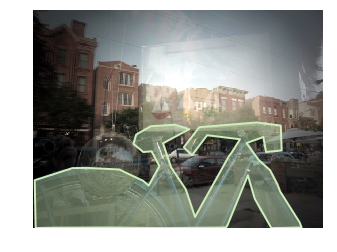

In [10]:
#将分割的信息叠加到图像上
# 必须先显示原图片
plt.imshow(image)
plt.axis('off')
coco.showAnns(ann)  # 将分割信息叠加
plt.show()

In [11]:
#获取图片描述
annFile = './cocos2014/annotations/captions_train2014.json'
coco_caps = COCO(annFile)
annIds3 = coco_caps.getAnnIds(imgIds=img['id'])
anns3 = coco_caps.loadAnns(annIds3)
coco_caps.showAnns(anns3) # 此句打印图片描述信息



loading annotations into memory...
Done (t=1.20s)
creating index...
index created!
Looking out of the window presents a hazy view of the town.
A windows reflection that shows a car in it.
A bicycle in a store window reflecting images of the cars and building across from it.
A bike sitting behind a display window 
some buildings cars and a blue bicycle and trees
